
Membros do Grupo de Processamento de Dados em Escala

*   Alexandre dos Santos Gualberto
*   Otávio Scieve Uliana
*   Yasmin Victoria Oliveira
*   Matheus Bessa Coutinho Colombo
*   Igor Kenji Kawai Ueno
*   Isadora Ferreira Pinheiro



# Introdução ao Big Data

No mundo atual, uma enorme quantidade de informação é constantemente gerada, seja essa informação textos, imagens, vídeos ou qualquer outro formato. Assim, foi criado o conceito de **Big Data** para se referir a esse grande volume de dados que, justamente pelo seu tamanho, é difícil de ser processado em um espaço de tempo útil.

O **Big Data** foi alavancado recentemente graças aos grandes avanços tecnológicos das últimas décadas. Hoje, quase toda a população possui um telefone celular, e um único aparelho desses é capaz de gerar **gigabytes** de vídeos e imagens. Além disso, quase todas essas pessoas possuem pelo menos um tipo de **rede social**, e cada um de seus passos nessas redes cria algum tipo de dado, que é usado por algoritmos para definir, por exemplo, o que será mostrado a essa pessoa.

## Os 5V’s do Big Data

O conceito de **Big Data** pode ser descrito por cinco características principais, conhecidas como os **5V’s**:

- **Volume**: A grande quantidade de dados gerada diariamente.
- **Velocidade**: A rapidez com que esses dados são criados e precisam ser processados.
- **Variedade**: A diversidade dos formatos dos dados (textos, imagens, vídeos, planilhas, etc.).
- **Veracidade**: A necessidade de garantir que os dados sejam confiáveis e precisos.
- **Valor**: O uso estratégico dessas informações para gerar insights e inteligência de negócios.

## Modelos Computacionais para Big Data

A existência do **Big Data** fez necessária a criação de modelos computacionais para processar enormes quantidades de dados em um tempo reduzido. Um dos primeiros modelos desenvolvidos para essa finalidade foi o **MapReduce**.

### O que é o MapReduce?

O **MapReduce** consiste em duas etapas principais: **Map** e **Reduce**.

1. **Fase de Map**:
   - A grande quantidade de dados é dividida em **grupos menores chamados splits**, que são distribuídos entre os vários nós (máquinas) de um **cluster de processamento**.
   - Essa divisão permite que a tarefa seja executada em **paralelo**, acelerando significativamente o processamento.

2. **Fase de Reduce**:
   - Os dados processados na fase de Map são **agrupados e ordenados** (shuffle).
   - Aplicação da função Reduce, que **agrega ou resume** os valores associados a cada chave.

### Hadoop e Spark: Estruturas de Software para Processamento Distribuído

Para facilitar a implementação de modelos como o **MapReduce**, que utiliza clusters de máquinas para o processamento de dados, surgiram estruturas de software voltadas para esse tipo de tarefa.

#### Hadoop

O **Hadoop** é uma das primeiras e mais amplamente adotadas plataformas para **Big Data**, projetada para **abstrair a complexidade do processamento distribuído**. Ele permite que grandes quantidades de dados sejam processadas sem que o usuário precise se preocupar com a infraestrutura subjacente.

**Limitações do Hadoop:**
- **Processamento em lote (batch processing)**, o que pode não ser ideal para aplicações que exigem respostas em tempo real.
- **Dependência de leitura e escrita em disco**, o que pode reduzir a velocidade do processamento.

#### Spark

O **Apache Spark** foi desenvolvido posteriormente como uma **evolução do Hadoop**, trazendo diversas otimizações, como:

- **Armazenamento em memória** para aumentar a velocidade de execução.
- **Execução otimizada de consultas**, reduzindo a latência do processamento.
- **APIs para diversas linguagens de programação** (Java, Scala, Python e R), tornando-o mais flexível para desenvolvedores.

O Spark é amplamente utilizado para:
- **Processamento em lote**
- **Análises interativas**
- **Streaming de dados em tempo real**
- **Machine Learning**
- **Processamento de grafos**

## Conclusão

O avanço do **Big Data** e das tecnologias associadas permitiu que as empresas e pesquisadores pudessem explorar **grandes volumes de dados de maneira eficiente**. Ferramentas como **Hadoop** e **Spark** são fundamentais para esse ecossistema, possibilitando o processamento distribuído de forma escalável. Com a crescente geração de dados, a tendência é que novas tecnologias surjam para tornar o processamento de Big Data **ainda mais rápido e acessível**.

# SparkContext e SparkSession
- O **SparkContext** é o ponto de entrada para todas as operações do Apache Spark. Ele atua como o nó principal no cluster de processamento, distribuindo tarefas entre os worker nodes.
- O **SparkSession** é uma API mais moderna e prática que substitui o SparkContext em muitos casos, permitindo uma integração mais fluida com **DataFrames e SQL**.
- Exemplo de inicialização do Spark:

In [ ]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setAppName("example").setMaster("local")
sc = SparkContext.getOrCreate(conf=conf)




In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("example") \
    .master("local") \
    .getOrCreate()

# RDDs (Resilient Distributed Datasets)
- RDDs são a estrutura de dados fundamental do Spark, permitindo operações distribuídas em larga escala.
- São imutáveis e permitem transformações e ações para processar dados de maneira eficiente.
- A vantagem é uma tolerância maior a falhas, distribuindo os dados em vários nós em um cluster (partições), operando-as em paralelo para maior eficiência.
- Não é indicado para aplicações que exigem alterações constantes nos dados.
- Métodos comuns:
  - map(), filter(), reduce(), collect().


# DataFrames no PySpark
- Os DataFrames são uma abstração de dados mais estruturada e otimizada do Spark, semelhante aos DataFrames do Pandas.
- São altamente eficientes para manipulação de grandes volumes de dados.
- Exemplo de criação de DataFrame:


In [ ]:
data = [("Alice", 25), ("Bob", 30), ("Charlie", 35)]
df = spark.createDataFrame(data, ["Nome", "Idade"])
df.show()

+-------+-----+
|   Nome|Idade|
+-------+-----+
|  Alice|   25|
|    Bob|   30|
|Charlie|   35|
+-------+-----+



# Consultas SQL no PySpark
- PySpark permite a execução de consultas SQL diretamente sobre os DataFrames, facilitando a análise de dados estruturados.
- Exemplo:

In [ ]:
df.createOrReplaceTempView("pessoas")
resultado = spark.sql("SELECT * FROM pessoas WHERE Idade > 30")
resultado.show()

+-------+-----+
|   Nome|Idade|
+-------+-----+
|Charlie|   35|
+-------+-----+



# Transformações e Ações
- Transformações: Criam um novo RDD ou DataFrame a partir de um existente. São lazy (executadas apenas quando necessário).
  - Exemplo: map(), filter(), groupBy().
- Ações: Executam operações e retornam um valor final.
  - Exemplo: count(), collect(), show().

## Otimizações e Armazenamento
- O Spark permite o armazenamento em memória para acelerar o processamento.
- Suporta particionamento de dados, melhorando a eficiência da computação distribuída.
- O uso do cache() e persist() ajuda a evitar recomputações desnecessárias.

# Algumas funções para manipulação de dados em PySpark

## GroupBy
O groupBy é uma operação em PySpark que agrupa linhas de um DataFrame com base em uma ou mais colunas. Após agrupar os dados, você pode aplicar funções de agregação, como soma, média, contagem, entre outras, para calcular valores agregados para cada grupo.

**Métodos agregados ao GroupBy:**
* **count()**: Use groupBy().count() para retornar a quantidade de linhas em cada grupo.
* **mean()**:	Retorna a média dos valores para cada grupo.
* **max()**:	Retorna o valor máximo para cada grupo.
* **min()**:	Retorna o valor mínimo para cada grupo.
* **sum()**:	Retorna a soma dos valores de cada grupo.
* **avg()**:	Retorna a média dos valores para cada grupo.
* **agg()**:	Use groupBy().agg() function, para calcular mais de um funçào agregada ao mesmo tempo.
* **pivot()**: o método pivot() é utilizado para especificar a coluna cujos valores distintos serão transformados em novas colunas. Cria uma tabela dinâmica que facilita análises, parecida com a pivot do Excell

In [ ]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip -q
!unzip -o iris.zip

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, StringType

spark = SparkSession.builder \
    .appName("IrisDataset") \
    .master("local") \
    .getOrCreate()

schema = StructType([
    StructField("sepal_length", DoubleType(), True),
    StructField("sepal_width", DoubleType(), True),
    StructField("petal_length", DoubleType(), True),
    StructField("petal_width", DoubleType(), True),
    StructField("species", StringType(), True)
])

df = spark.read.csv("iris.data", schema=schema, header=False)
df.show(5)

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows



In [ ]:
df.groupBy("species").count().show()

+---------------+-----+
|        species|count|
+---------------+-----+
| Iris-virginica|   50|
|    Iris-setosa|   50|
|Iris-versicolor|   50|
+---------------+-----+



In [ ]:
from pyspark.sql.functions import sum, avg, max, min, count

df.groupBy("species").agg(
    avg("petal_length").alias("mean_petal_length"),
    max("petal_length").alias("max_petal_length"),
    min("petal_length").alias("min_petal_length"),
    count("species").alias("num_examples")
).show()

+---------------+-----------------+----------------+----------------+------------+
|        species|mean_petal_length|max_petal_length|min_petal_length|num_examples|
+---------------+-----------------+----------------+----------------+------------+
| Iris-virginica|            5.552|             6.9|             4.5|          50|
|    Iris-setosa|            1.464|             1.9|             1.0|          50|
|Iris-versicolor|             4.26|             5.1|             3.0|          50|
+---------------+-----------------+----------------+----------------+------------+



## Window
O Window em PySpark é usado para definir uma janela para operações de agregação e classificação sem colapsar os dados. Ele permite aplicar funções de janela como row_number, rank, dense_rank, sum, avg, entre outras, sobre um subconjunto de dados (janela) definido por partições e ordenações.

**Funções de Janela em PySpark**
* **row_number()**: Retorna um número sequencial começando de 1 dentro de uma
partição da janela.
* **rank()**: Retorna a classificação das linhas dentro de uma partição da janela, com lacunas.
* **percent_rank()**: Retorna a classificação percentil das linhas dentro de uma partição da janela.
* **dense_rank()**: Retorna a classificação das linhas dentro de uma partição da janela sem quaisquer lacunas. Enquanto rank() retorna a classificação com lacunas.
* **ntile(n)**: Retorna o id do enésimo intervalo (ntile) em uma partição da janela.
* **cume_dist()**: Retorna a distribuição cumulativa dos valores dentro de uma partição da janela.
* **lag(columnname, offset, defaultvalue)**: No PySpark, a função lag() recupera o valor de uma coluna de uma linha anterior dentro da mesma janela. Ela permite aos usuários comparar valores entre linhas adjacentes e realizar cálculos com base na diferença ou relação entre valores consecutivos em um DataFrame.
* **lead(columnname, offset, defaultvalue)**: A função lead() no PySpark recupera o valor de uma coluna de uma linha subsequente dentro da mesma janela. Ela permite aos usuários acessar valores à frente da linha atual e realizar comparações ou cálculos com base em valores futuros em um DataFrame.

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number, rank, dense_rank, cume_dist

windowSpec  = Window.partitionBy("species").orderBy("petal_length")
df.withColumn("row_number", row_number().over(windowSpec)).show()

+------------+-----------+------------+-----------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|row_number|
+------------+-----------+------------+-----------+-----------+----------+
|         4.6|        3.6|         1.0|        0.2|Iris-setosa|         1|
|         4.3|        3.0|         1.1|        0.1|Iris-setosa|         2|
|         5.8|        4.0|         1.2|        0.2|Iris-setosa|         3|
|         5.0|        3.2|         1.2|        0.2|Iris-setosa|         4|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|         5|
|         5.4|        3.9|         1.3|        0.4|Iris-setosa|         6|
|         5.5|        3.5|         1.3|        0.2|Iris-setosa|         7|
|         4.4|        3.0|         1.3|        0.2|Iris-setosa|         8|
|         5.0|        3.5|         1.3|        0.3|Iris-setosa|         9|
|         4.5|        2.3|         1.3|        0.3|Iris-setosa|        10|
|         4.4|        3.2

- **GroupBy**:

  * Agrupa linhas e aplica funções de agregação a cada grupo.
  * Reduz o número de linhas no DataFrame.
  * Útil para obter resumos agregados dos dados.

- **Window**:

  * Define uma janela para aplicar funções de janela, calculando sobre subconjuntos de dados.
  * Mantém todas as linhas do DataFrame.
  * Útil para cálculos mais complexos, como somas acumuladas e classificações.
  
Ambas as operações são essenciais para análises e transformações de dados em PySpark, mas servem a propósitos diferentes dependendo do tipo de resultado e análise desejada.

## User-Defined Functions (UDFs) em PySpark
UDFs (User-Defined Functions) em PySpark são funções definidas pelo usuário que permitem aplicar lógica personalizada em colunas de DataFrames. Elas são úteis quando as funções integradas de PySpark não atendem às necessidades específicas de uma análise ou transformação de dados.

Para criar e usar uma UDF em PySpark, você geralmente segue estes passos:

* Definir a função Python padrão que contém a lógica personalizada.
* Registrar essa função como uma UDF usando pyspark.sql.functions.udf.
* Aplicar a UDF ao DataFrame.

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def classify_petal_length(length):
    if length < 2:
        return "Small"
    elif length < 5:
        return "Medium"
    else:
        return "Large"

classify_petal_length_udf = udf(classify_petal_length, StringType())

In [ ]:
df = df.withColumn("petal_size", classify_petal_length_udf(df["petal_length"]))
df.show()

+------------+-----------+------------+-----------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|petal_size|
+------------+-----------+------------+-----------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|     Small|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|     Small|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|     Small|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|     Small|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|     Small|
|         5.4|        3.9|         1.7|        0.4|Iris-setosa|     Small|
|         4.6|        3.4|         1.4|        0.3|Iris-setosa|     Small|
|         5.0|        3.4|         1.5|        0.2|Iris-setosa|     Small|
|         4.4|        2.9|         1.4|        0.2|Iris-setosa|     Small|
|         4.9|        3.1|         1.5|        0.1|Iris-setosa|     Small|
|         5.4|        3.7

# Introdução à MLlib


A MLlib é a biblioteca de Machine Learning do PySpark, que busca tornar modelos de aprendizado de máquina escaláveis.

Há 2 APIs do MLlib, uma baseada em DataFrames e outra em RDDS, entretanto, destaca-se que o primeiro apresenta uma API mais amigável aos usuários.





## Técnica de pré-processamento para treinamento de Modelos

### Remoção de duplicadas
Remover duplicatas ajuda a evitar redundâncias nos dados, garantindo que cada amostra seja única, o que é essencial para evitar o viés durante o treinamento do modelo.

A remoção das linhas duplicadas pode ser feita usando o método `dropDuplicates`, que retorna os dados sem as duplicadas.

In [ ]:
df = spark.read.csv("iris.data", schema=schema, header=False)
df = df.dropDuplicates()

### Remoção de valores nulos

A remoção de uma linha pode ser feita caso pelo menos um de seus valores esteja faltando (`any`) ou caso todos seus valores estejam faltando (`all`).

In [ ]:
df = df.na.drop(how='any') # Remove qualquer linha que tenha pelo menos 1 valor faltante
df = df.na.drop(how='all') # Remove qualquer linha que tenha todos os valores faltante

### Tratamento de valores nulos

Em vez de remover linhas inteiras com valores nulos, é possível substituí-los por medidas estatísticas, como a média, mediana ou moda, dependendo do caso de uso. Isso ajuda a preservar informações valiosas nos dados.

```python
# Substituição por média
mean_value = df.select(mean('column_name')).collect()[0][0]
df = df.fillna({'column_name': mean_value})

# Substituição por mediana (exemplo ilustrativo, cálculo da mediana deve ser implementado)
median_value = 50  # Exemplo de valor calculado previamente
df = df.fillna({'column_name': median_value})

# Substituição por moda (exemplo ilustrativo)
mode_value = 30  # Exemplo de valor calculado previamente
df = df.fillna({'column_name': mode_value})
```

### Remoção de valores inconsistentes

A definição de valores inconsistentes depende dos dados sendo considerados. Por exemplo, em uma coluna com dados numéricos com casas decimais e unidade de medida, é possível aplicar uma expressão regular para filtrar os valores que atendem ao formato esperado. Além disso, pode-se definir intervalos válidos para eliminar valores fora do esperado, como no caso de limites mínimos e máximos.

```python
# Filtragem por formato utilizando expressão regular
expr = '([0-9]+\.?[0-9]*)'
filtered_df = df.filter(df[column].rlike(expr))

# Filtragem por intervalos válidos
df = df.filter((df['column_name'] >= 0) & (df['column_name'] <= 100))
```

### Conversão de colunas

A conversão das colunas deve ser feita de acordo com os dados sendo considerados, por exemplo, uma coluna com valor numérico seguido por unidades de medida diversas pode ter seus valores convertido para o tipo `double`.

```python
def convert(value):
    if value.endswith('IU'):
        return float(value[:-2])
    elif value.endswith('mcg'):
        return float(value[:-1]) * 40
    else:
        return float(value)

# Registrar a função como UDF (User Defined Function)
convert_udf = udf(convert, DoubleType())

# Aplicar a função de conversão
df = df.withColumn("column_name", convert_udf(col("column_name")))
```

### Normalização ou Padronização
Normalização e padronização são usadas para ajustar os valores numéricos em uma escala uniforme, garantindo que todas as variáveis tenham a mesma importância no modelo.
- **Normalização**: escala os dados para um intervalo definido, como [0, 1].
- **Padronização**: ajusta os dados para que tenham média 0 e desvio padrão 1.

In [ ]:
from pyspark.ml.feature import StandardScaler, VectorAssembler,  StringIndexer

# Codificar a coluna 'species' para valores numéricos (0,1,2)
indexer = StringIndexer(inputCol="species", outputCol="label")
df = indexer.fit(df).transform(df)

# Criar um vetor de features para a normalização
assembler = VectorAssembler(
    inputCols=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    outputCol="features"
)
df = assembler.transform(df)

# Aplicar o StandardScaler para padronização
scaler = StandardScaler(inputCol="features", outputCol="standardized_features", withMean=True, withStd=True)
standardized_df = scaler.fit(df).transform(df)

standardized_df.select("features", "standardized_features").show(truncate=False)

+-----------------+----------------------------------------------------------------------------------+
|features         |standardized_features                                                             |
+-----------------+----------------------------------------------------------------------------------+
|[5.6,2.7,4.2,1.3]|[-0.30932653252023296,-0.8141309483913763,0.2386022911734323,0.12027914653219025] |
|[7.6,3.0,6.6,2.1]|[2.102928124268847,-0.12764577011107614,1.60292787182152,1.1758632981878294]      |
|[7.2,3.2,6.0,1.8]|[1.6204771929110315,0.3300110154091247,1.2618464766594983,0.7800192413169648]     |
|[5.7,3.0,4.2,1.2]|[-0.1887137996807783,-0.12764577011107614,0.2386022911734323,-0.01166887242476476]|
|[6.2,2.9,4.3,1.3]|[0.4143498645164917,-0.35647416287117656,0.29544919036710243,0.12027914653219025] |
|[5.4,3.9,1.3,0.4]|[-0.55055199819914,1.9318097647298256,-1.4099577854430076,-1.067253024080404]     |
|[5.7,2.5,5.0,2.0]|[-0.1887137996807783,-1.2717877339115773,0.69337748472

## Aprendizado Supervisionado

O aprendizado supervisionado envolve treinar um modelo usando dados rotulados, permitindo que ele preveja a saída para novos dados. A biblioteca MLlib do PySpark oferece suporte a diversos modelos supervisionados, incluindo classificação, regressão e árvores de decisão.

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Dividir os dados em treino e teste (80% treino, 20% teste)
train_df, test_df = standardized_df.randomSplit([0.8, 0.2])

lr = LogisticRegression(featuresCol="standardized_features", labelCol="label")
lr_model = lr.fit(train_df)

predictions = lr_model.transform(test_df)

predictions.select("features", "label", "prediction").show(10)

+-----------------+-----+----------+
|         features|label|prediction|
+-----------------+-----+----------+
|[4.6,3.1,1.5,0.2]|  2.0|       2.0|
|[5.0,3.4,1.5,0.2]|  2.0|       2.0|
|[5.1,3.5,1.4,0.3]|  2.0|       2.0|
|[5.2,3.4,1.4,0.2]|  2.0|       2.0|
|[5.2,4.1,1.5,0.1]|  2.0|       2.0|
|[5.4,3.4,1.7,0.2]|  2.0|       2.0|
|[5.6,2.8,4.9,2.0]|  1.0|       1.0|
|[5.6,3.0,4.5,1.5]|  0.0|       0.0|
|[6.0,2.2,4.0,1.0]|  0.0|       0.0|
|[6.0,2.2,5.0,1.5]|  1.0|       1.0|
+-----------------+-----+----------+
only showing top 10 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Acurácia
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)

# F1-Score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)

print(f"Acurácia do modelo: {accuracy:.4f}")
print(f"F1-Score do modelo: {f1_score:.4f}")

Acurácia do modelo: 0.9091
F1-Score do modelo: 0.9105


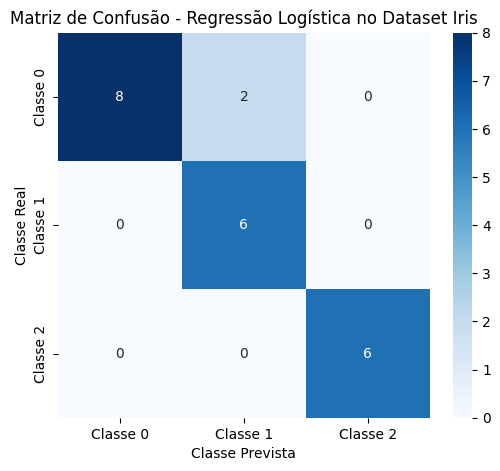

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

predictions_pandas = predictions.select("label", "prediction").toPandas()

# Criar a matriz de confusão
cm = confusion_matrix(predictions_pandas["label"], predictions_pandas["prediction"])

# Criar um heatmap para visualizar a matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1", "Classe 2"],
            yticklabels=["Classe 0", "Classe 1", "Classe 2"])

plt.title("Matriz de Confusão - Regressão Logística no Dataset Iris")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

## Aprendizado Não-Supervisionado

O aprendizado não supervisionado envolve treinar um modelo usando dados não rotulados. A biblioteca MLlib do PySpark oferece suporte a tarefas como agrupamento, incluindo modelos como, por exemplo, k-means.

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

k_means_df = standardized_df.select("standardized_features", "label")

kmeans = KMeans(featuresCol="standardized_features", k=3)
model = kmeans.fit(k_means_df.select("standardized_features"))

predictions_kmeans = model.transform(k_means_df)

evaluator = ClusteringEvaluator(featuresCol="standardized_features", metricName="silhouette")
silhouette = evaluator.evaluate(predictions_kmeans)

print(f"Índice de Silhouette: {silhouette}")

Índice de Silhouette: 0.6444440292703125


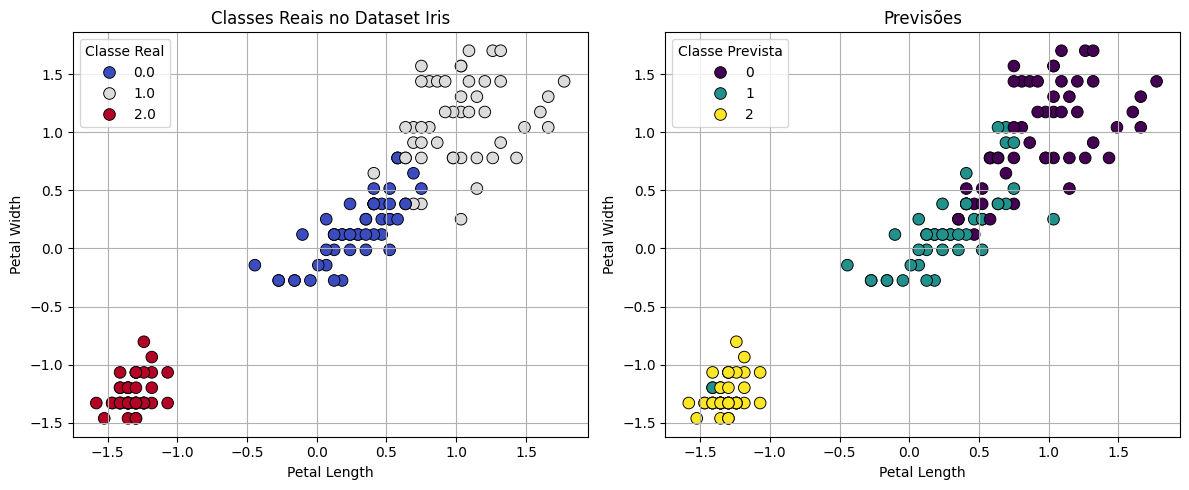

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

predictions_pandas = predictions_kmeans.select("standardized_features", "label", "prediction").toPandas()

predictions_pandas["petal_length"] = predictions_pandas["standardized_features"].apply(lambda x: x[2])
predictions_pandas["petal_width"] = predictions_pandas["standardized_features"].apply(lambda x: x[3])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    x=predictions_pandas["petal_length"],
    y=predictions_pandas["petal_width"],
    hue=predictions_pandas["label"],
    palette="coolwarm",
    s=70,
    edgecolor="k"
)
plt.title("Classes Reais no Dataset Iris")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Classe Real")
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(
    x=predictions_pandas["petal_length"],
    y=predictions_pandas["petal_width"],
    hue=predictions_pandas["prediction"],
    palette="viridis",
    s=70,
    edgecolor="k"
)
plt.title("Previsões")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Classe Prevista")
plt.grid(True)

plt.tight_layout()
plt.show()